## Exploratory Data Analysis: EuroSAT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Import libraries
import random
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.image as mpimg
from PIL import Image

In [3]:
# Path to the folder
path = "/content/drive/MyDrive/EuroSAT_RGB"

# List of all the subfolders
folders = os.listdir(path)

# Loop over all the subfolders and count the number of images
for folder in folders:
    print(folder + " : " + str(len(glob.glob(path + "/" + folder + "/*.jpg"))))

print("Total number of images : " + str(sum([len(files) for r, d, files in os.walk(path)])))

AnnualCrop : 3000
River : 2500
HerbaceousVegetation : 3000
Industrial : 2500
Residential : 3000
Pasture : 2000
Forest : 3000
SeaLake : 3000
PermanentCrop : 2500
Highway : 2500
Total number of images : 27000


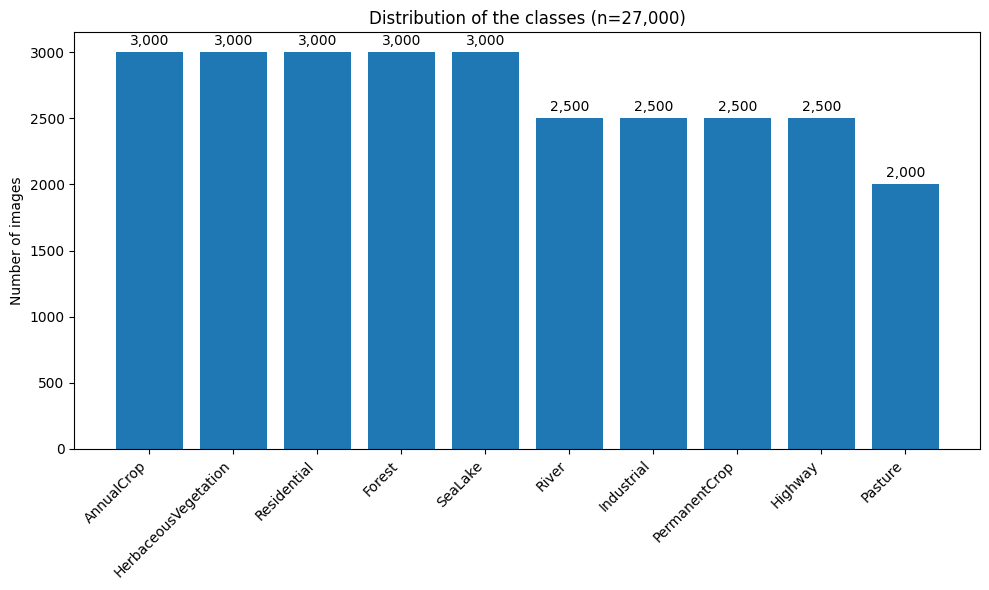

In [4]:
# List of all the number of images in each subfolder
num_of_images = [len(glob.glob(os.path.join(path, folder, "*.jpg"))) for folder in folders]

# Sort the folders and num_of_images in descending order based on the number of images
sorted_data = sorted(zip(folders, num_of_images), key=lambda x: x[1], reverse=True)
folders, num_of_images = zip(*sorted_data)

# Plot the distribution of the images
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(folders, num_of_images)
ax.set_ylabel("Number of images")
ax.set_title("Distribution of the classes (n=27,000)")

# Add annotations on top of each bar
for bar, num in zip(bars, num_of_images):
    height = bar.get_height()
    ax.annotate('{:,}'.format(num),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Width:  64
Height:  64
Channel:  3
Width:  64
Height:  64
Channel:  3
Width:  64
Height:  64
Channel:  3
Width:  64
Height:  64
Channel:  3
Width:  64
Height:  64
Channel:  3
Width:  64
Height:  64
Channel:  3
Width:  64
Height:  64
Channel:  3
Width:  64
Height:  64
Channel:  3
Width:  64
Height:  64
Channel:  3
Width:  64
Height:  64
Channel:  3


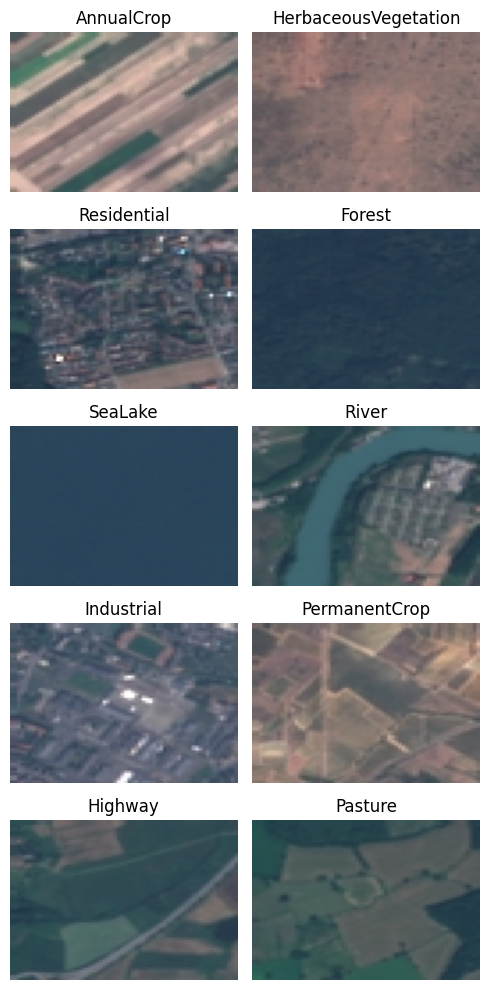

In [5]:
# Create a 5x2 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(5, 10))
fig.subplots_adjust(hspace=0.5)

# Loop over all the subfolders and visualize one image from each subfolder
for i, folder in enumerate(folders):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    img = mpimg.imread(os.path.join(path, folder, os.listdir(os.path.join(path, folder))[0]))
    ax.imshow(img, aspect='auto')
    ax.set_title(folder)
    ax.axis("off")

    width, height, channel = img.shape
    print('Width: ', width)
    print('Height: ', height)
    print('Channel: ', channel)

plt.tight_layout()
plt.show()

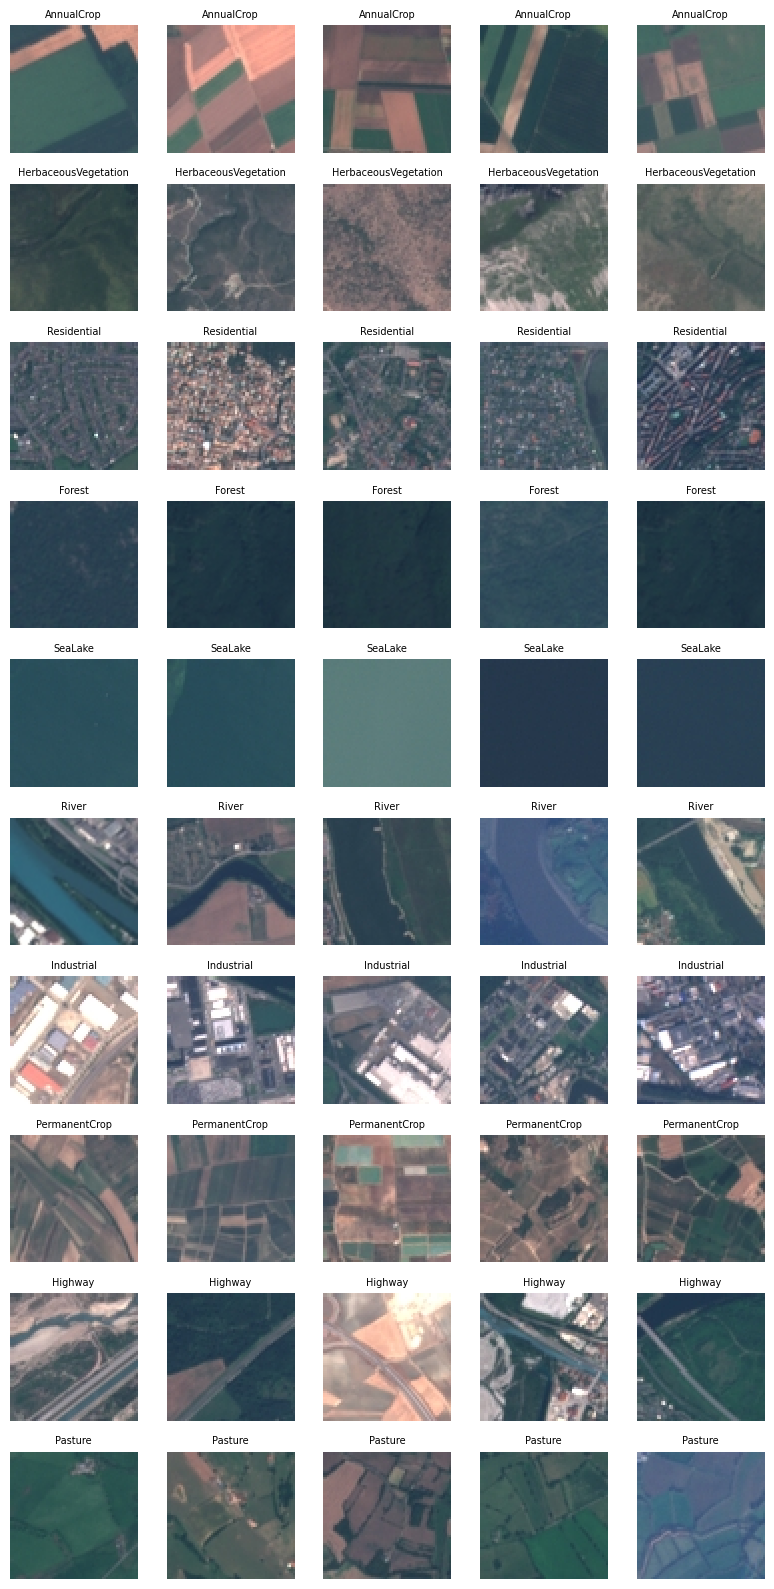

In [6]:
# Define the figure size
rows = 10
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(8, 16))
fig.subplots_adjust(wspace=0.05, hspace=0.05)

# Loop over all the subfolders and randomly select five images from each subfolder
for i in range(rows):
    for j in range(cols):
        files = os.listdir(path + "/" + folders[i])
        index = random.randint(0, len(files))
        img_path = path + "/" + folders[i] + "/" + files[index]
        img = mpimg.imread(img_path)
        ax[i][j].imshow(img)
        ax[i][j].axis("off")
        ax[i][j].set_title(folders[i], fontsize=7)

plt.tight_layout()
plt.show()

In [7]:
# Check image size
inconsistent_dimensions = []
target_width, target_height = 64, 64
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                width, height = img.size
                if width != target_width or height != target_height:
                    inconsistent_dimensions.append((image_path, width, height))

# Print the results
print("\nImages with Inconsistent Sizes:")
for image_path, width, height in inconsistent_dimensions:
    print(f"{image_path}: {width}x{height} (expected: {target_width}x{target_height})")


Images with Inconsistent Sizes:


In [8]:
# Create a set to store unique image formats
image_formats = set()

# Iterate through the dataset directory
for root, _, files in os.walk(path):
    for file in files:
        if file.lower().endswith(('.jpg')):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    image_formats.add(img.format)
            except Exception as e:
                print(f"Error processing {image_path}: {str(e)}")

# Check if there's more than one unique image format
if len(image_formats) == 1:
    print(f"All images in the dataset have the same format: {image_formats.pop()}")
else:
    print("Images in the dataset have multiple formats:")
    for format in image_formats:
        print(format)

All images in the dataset have the same format: JPEG
